In [2]:
import numpy as np
import pandas as pdx
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored, cprint

In [3]:
from ambientes import *
from agents import *
from algoritmos import *
from utils import Episode, Experiment
from plot_utils import PlotGridValues, Plot
from tests import *

# Miniproyecto_3

## Ejercicio 1
### Resolver ABC con SARSA

1. Los parámetros  de entrenamiento.
2. La imagen de recompensa total por episodio durante el entrenamiento.
3. El histograma de prueba con las recompensas totales por episodio.
4. La imagen de la política optima y los valores q de cada estado.

Nota: Resolver el entorno significa obtener una recompensa total promedio mayor a 8 en
el test.



Running simulations: 100%|██████████████████████| 10/10 [00:04<00:00,  2.30it/s]


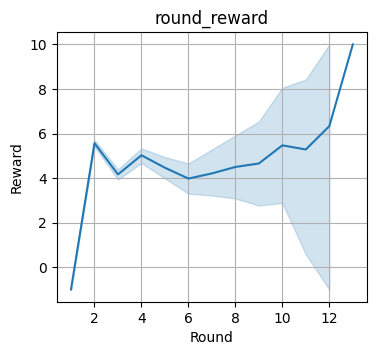

"\nepisode = Episode(environment=env,                   env_name='ABC',                   agent=agent,                   model_name='Random',                   num_rounds=100\n                )\n"

In [4]:
# Create environment
shape = (1,3)
env = ABC()
# Create agent
parameters = {\
    'nS': 3,\
    'nA': 2,\
    'gamma': 0.8,\
    'epsilon': 0.1,\
    'alpha': 0.1,\
}
agent_SARSA = SARSA(parameters=parameters)


#Create experiment
experiment = Experiment(environment=env,\
                        env_name='ABC', \
                        num_rounds=200, \
                        num_episodes=500, \
                        num_simulations=10)

# Train agent
agents = experiment.run_experiment(agents=[agent_SARSA],\
                                  names=['SARSA'], \
                                  measures=['round_reward'], \
                                  learn=True)

'''
episode = Episode(environment=env, \
                  env_name='ABC', \
                  agent=agent, \
                  model_name='Random', \
                  num_rounds=100
                )
'''


	Running episodes:   0%|                                 | 0/10 [00:00<?, ?it/s]
                                                                                
	Running episodes:   0%|                                 | 0/10 [00:00<?, ?it/s]
                                                                                
	Running episodes:   0%|                                 | 0/10 [00:00<?, ?it/s]
                                                                                
	Running episodes:   0%|                                 | 0/10 [00:00<?, ?it/s]
                                                                                
	Running episodes:   0%|                                 | 0/10 [00:00<?, ?it/s]
                                                                                
	Running episodes:   0%|                                 | 0/10 [00:00<?, ?it/s]
                                                                                
	Running episodes:   0%|    

Average sum of rewards:
 model
Random    83.0
Name: reward, dtype: float64

Episode termination percentage:
 model
Random    1000.0
Name: done, dtype: float64


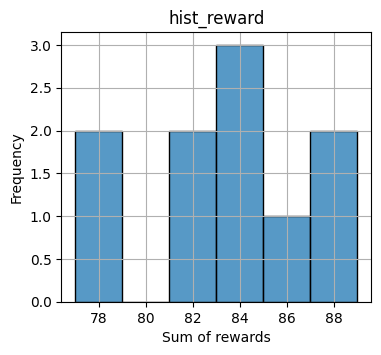

In [5]:
# Create experiment
experiment = Experiment(environment=env,\
                        env_name='ABC', \
                        num_rounds=10, \
                        num_episodes=10, \
                        num_simulations=10)
# Test agent already trained
agents = experiment.run_experiment(agents=[agent_SARSA],\
                                  names=['Random'], \
                                  measures=['hist_reward'], \
                                  learn=False)

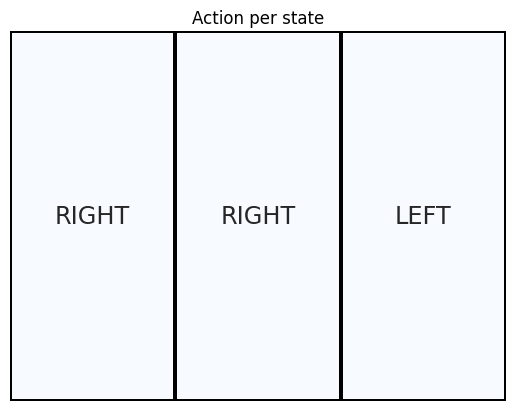

In [6]:
# Create environment
env = ABC()
shape=(1,3)
pp = PlotGridValues(shape=shape,dict_acciones=env.dict_acciones)
s_agent = agents[0]
p = s_agent.policy
policy = [np.argmax(p[s,]) for s in range(env.nS)]
policy = np.flipud(np.reshape(policy, shape))
pp.plot_policy(policy)